<a href="https://colab.research.google.com/github/ramboraj123/INSE6220/blob/main/FinalProject_40194809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification on Diamond dataset**

I am using this dimond dataset from Kaggle : https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/data

And the datset consists of data categorized based on on the class labels : Fair, good, Very Good, Ideal and Premium 

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes.

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 11.2 MB/s 
     |████████████████████████████████| 141 kB 49.3 MB/s 
     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 70.2 MB/s 
     |████████████████████████████████| 56 kB 1.4 MB/s 
     |████████████████████████████████| 16.5 MB 48.4 MB/s 
     |████████████████████████████████| 6.8 MB 20.0 MB/s 
     |████████████████████████████████| 25.8 MB 157 kB/s 
     |████████████████████████████████| 325 kB 61.8 MB/s 
     |████████████████████████████████| 2.0 MB 62.9 MB/s 
     |████████████████████████████████| 1.7 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.0 MB 60.5 MB/s 
     |████████████████████████████████|

**Install Pycaret**

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**DIAMOND DATASET**

A data frame with 53940 rows and 10 variables:

1. **price** - price in US dollars (\$326--\$18,823)

2. **carat** -  weight of the diamond (0.2--5.01)

3. **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. **color** - diamond colour, from J (worst) to D (best)

5. **clarity**  - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. **x** - length in mm (0--10.74)

7. **y** - width in mm (0--58.9)

8. **z** - depth in mm (0--31.8)

9. **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. **table** - width of top of diamond relative to widest point (43--95)

Link to dataset: https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/data


**Changes made to datset:**

1. It has 10 columns out of which I have only retained columns namely carat (weight of diamond), depth (Z/mean [x,y]), price (US Dollars), x (Length), y (Width), z (Depth) and cut (modified colour to class).

2. Replaced alphabets with numbers for classification purpose.

3. The dataset is huge in number so plenty of rows have been dropped.

4.  Cut is  converted to numberic value and now there are only 3 class instead of 5 as in the original dataset and their meaning is as follows

  1 = Premeium 
  2 = Very Good
  3 = Good 



In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ramboraj123/INSE6220/main/diamonds_final.csv')
df.head(25)

carat  depth  price     x     y     z  class
0    0.23   61.5    326  3.95  3.98  2.43      1
1    0.21   59.8    326  3.89  3.84  2.31      1
2    0.23   56.9    327  4.05  4.07  2.31      1
3    0.29   62.4    334  4.20  4.23  2.63      2
4    0.31   63.3    335  4.34  4.35  2.75      3
5    0.24   62.8    336  3.94  3.96  2.48      3
6    0.24   62.3    336  3.95  3.98  2.47      2
7    0.26   61.9    337  4.07  4.11  2.53      2
8    0.22   65.1    337  3.87  3.78  2.49      1
9    0.23   59.4    338  4.00  4.05  2.39      2
10   0.30   64.0    339  4.25  4.28  2.73      3
11   0.23   62.8    340  3.93  3.90  2.46      3
12   0.22   60.4    342  3.88  3.84  2.33      3
13   0.31   62.2    344  4.35  4.37  2.71      3
14   0.20   60.2    345  3.79  3.75  2.27      1
15   0.32   60.9    345  4.38  4.42  2.68      1
16   0.30   62.0    348  4.31  4.34  2.68      2
17   0.30   63.4    351  4.23  4.29  2.70      3
18   0.30   63.8    351  4.23  4.26  2.71      3
19   0.30   62.7    351  4.21  4.27  2.66      3
20   0.30   63.3    351  4.26  4.30  2.71      2
21   0.23   63.8    352  3.85  3.92  2.48      1
22   0.23   61.0    353  3.94  3.96  2.41      2
23   0.31   59.4    353  4.39  4.43  2.62      3
24   0.31   58.1    353  4.44  4.47  2.59      3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   5310 non-null   float64
 1   depth   5310 non-null   float64
 2   price   5310 non-null   int64  
 3   x       5310 non-null   float64
 4   y       5310 non-null   float64
 5   z       5310 non-null   float64
 6   class   5310 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 290.5 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  18


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

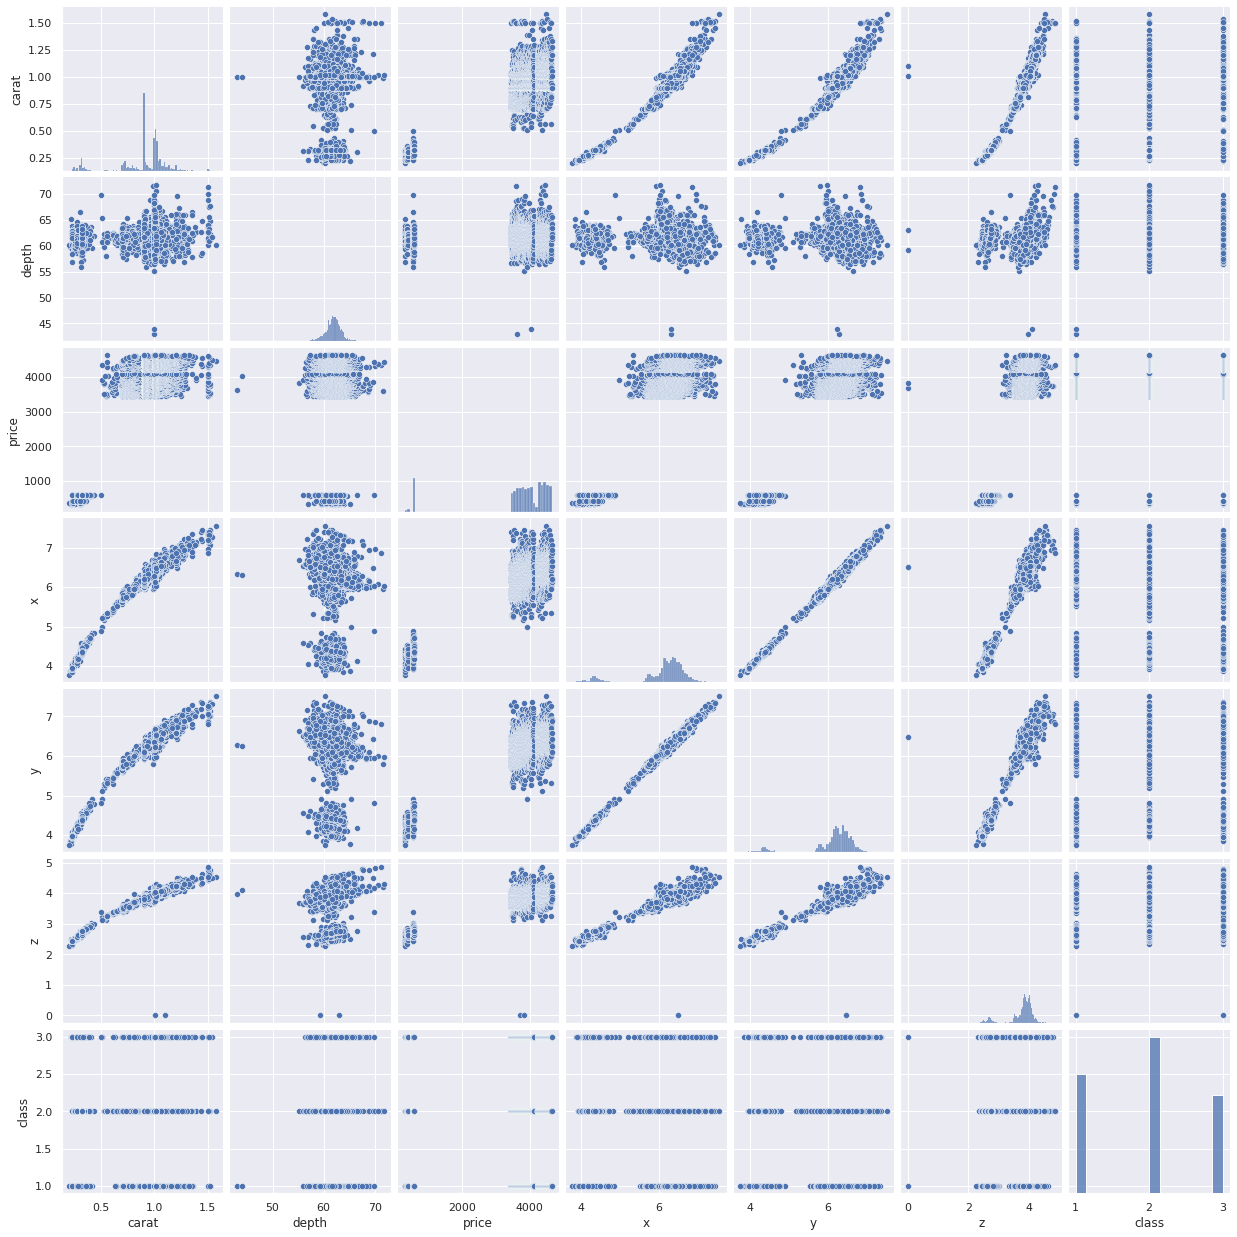

<Figure size 504x360 with 0 Axes>

In [ ]:
sns.pairplot(df)
plt.show()
#ax = plt.figure()
#ax = sns.pairplot(df)
plt.savefig('pair_plot.png')

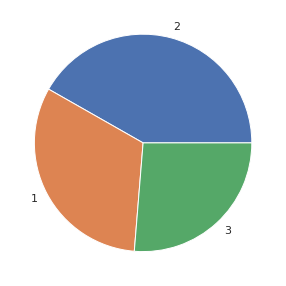

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

carat  depth  price     x     y     z
0   0.23   61.5    326  3.95  3.98  2.43
1   0.21   59.8    326  3.89  3.84  2.31
2   0.23   56.9    327  4.05  4.07  2.31
3   0.29   62.4    334  4.20  4.23  2.63
4   0.31   63.3    335  4.34  4.35  2.75
5   0.24   62.8    336  3.94  3.96  2.48
6   0.24   62.3    336  3.95  3.98  2.47
7   0.26   61.9    337  4.07  4.11  2.53
8   0.22   65.1    337  3.87  3.78  2.49
9   0.23   59.4    338  4.00  4.05  2.39

In [ ]:
X.describe().transpose()

count         mean          std     min      25%      50%      75%  \
carat  5310.0     0.897429     0.235333    0.20     0.90     0.95     1.02   
depth  5310.0    61.878437     1.669358   43.00    61.00    62.00    62.80   
price  5310.0  3701.800188  1112.655086  326.00  3655.25  3967.00  4363.00   
x      5310.0     6.104405     0.665661    3.79     6.04     6.27     6.48   
y      5310.0     6.104277     0.655677    3.75     6.05     6.27     6.47   
z      5310.0     3.775855     0.420260    0.00     3.73     3.88     4.01   

           max  
carat     1.58  
depth    71.80  
price  4637.00  
x         7.55  
y         7.51  
z         4.87

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

carat     depth     price         x         y         z
0 -2.836369 -0.226717 -3.034290 -3.236796 -3.240129 -3.202739
1 -2.921363 -1.245169 -3.034290 -3.326941 -3.453669 -3.488304
2 -2.836369 -2.982528 -3.033391 -3.086555 -3.102854 -3.488304
3 -2.581388  0.312463 -3.027099 -2.861194 -2.858808 -2.726798
4 -2.496394  0.851643 -3.026200 -2.650857 -2.675774 -2.441234
5 -2.793873  0.552099 -3.025302 -3.251820 -3.270635 -3.083754
6 -2.793873  0.252554 -3.025302 -3.236796 -3.240129 -3.107551
7 -2.708879  0.012918 -3.024403 -3.056507 -3.041842 -2.964769
8 -2.878866  1.930004 -3.024403 -3.356989 -3.545187 -3.059957
9 -2.836369 -1.484805 -3.023504 -3.161676 -3.133359 -3.297928

In [ ]:
X.describe().transpose()

count          mean       std        min       25%       50%  \
carat  5310.0 -2.569194e-16  1.000094  -2.963860  0.010924  0.223409   
depth  5310.0 -5.294948e-15  1.000094 -11.309868 -0.526262  0.072827   
price  5310.0 -4.281990e-17  1.000094  -3.034290 -0.041841  0.238371   
x      5310.0 -3.532642e-16  1.000094  -3.477181 -0.096762  0.248791   
y      5310.0  1.413057e-15  1.000094  -3.590945 -0.082788  0.252775   
z      5310.0  0.000000e+00  1.000094  -8.985426 -0.109121  0.247835   

            75%       max  
carat  0.520887  2.900715  
depth  0.552099  5.943902  
price  0.594310  0.840591  
x      0.564297  2.171874  
y      0.557832  2.144130  
z      0.557196  2.603744

**Observations and variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Box and Whisker Plots**

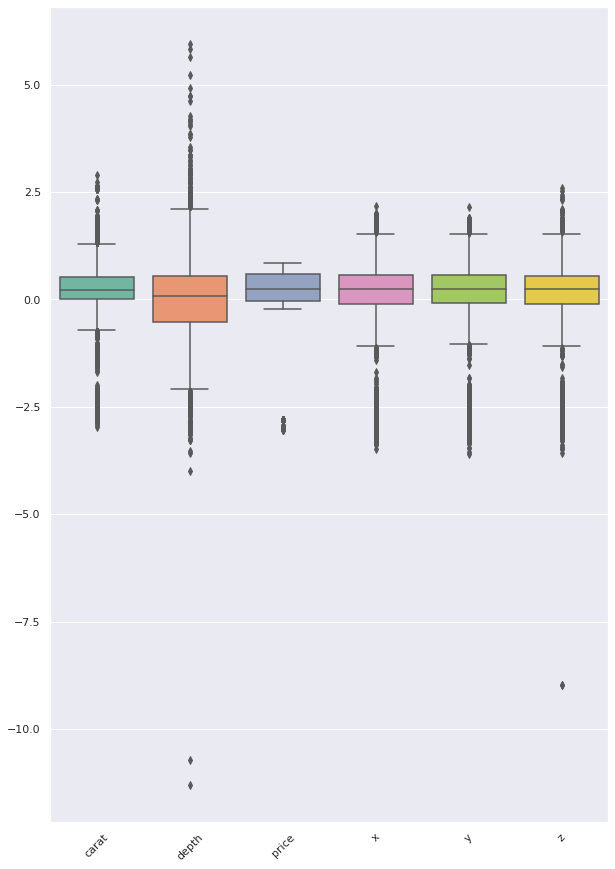

In [ ]:
ax = plt.figure(figsize = (10,15))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.savefig('box_plot.png')


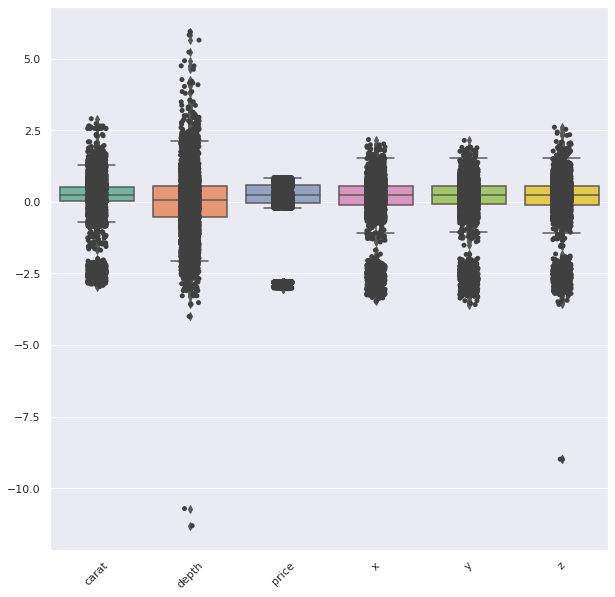

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure(figsize = (10,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.savefig('box_plot_with_data_points.png')


**Correlation Matrix**

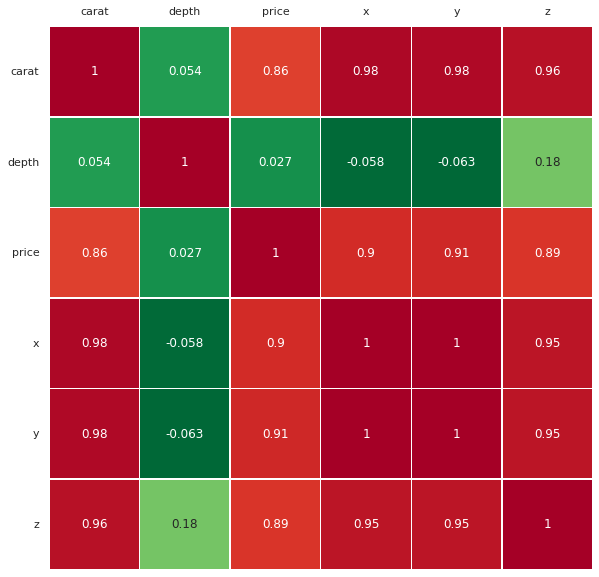

In [ ]:
ax = plt.figure(figsize=(16, 10)) 
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.savefig('correlation_Matrix.png')


#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

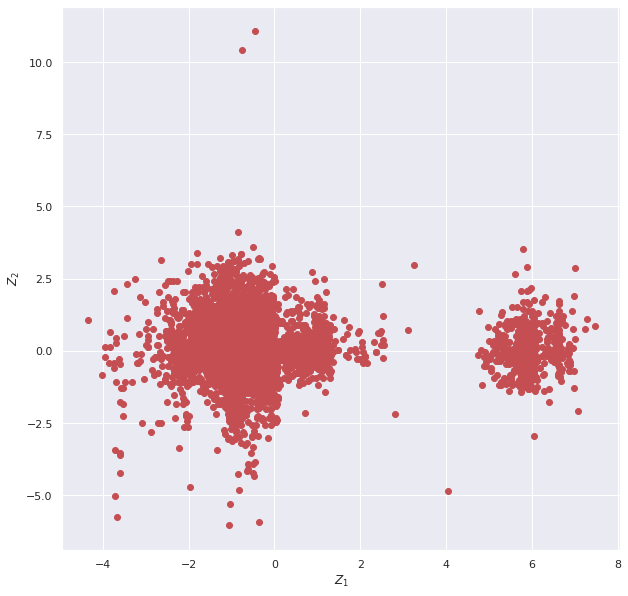

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure(figsize=(10, 10))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.savefig('pca_z1z2.png')

**Eigenvectors**

[[-0.4505605  -0.01886092  0.39063987  0.39945058  0.68854032 -0.10193849]
 [-0.01599208 -0.98008485 -0.01013326  0.15613136 -0.12098439  0.0078123 ]
 [-0.42828498  0.00677056 -0.88264188  0.07794804  0.17691371  0.00975192]
 [-0.45441907  0.09241472  0.16789052  0.20048373 -0.39558799  0.74839296]
 [-0.45456911  0.09719618  0.11739518  0.17161323 -0.55796818 -0.65525461]
 [-0.4474167  -0.14506733  0.16208724 -0.860431    0.11026424 -0.00133567]]


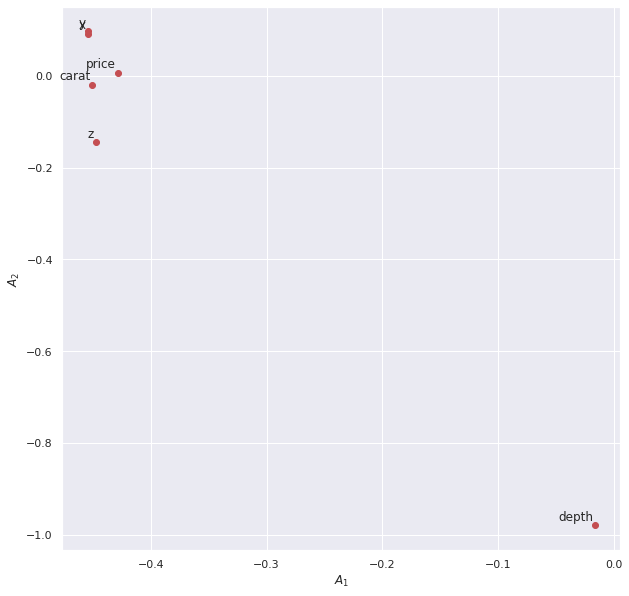

In [ ]:
A = pca.components_.T 
print(A)

plt.figure(figsize=(10, 10))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

plt.savefig('EigenVectors.png')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


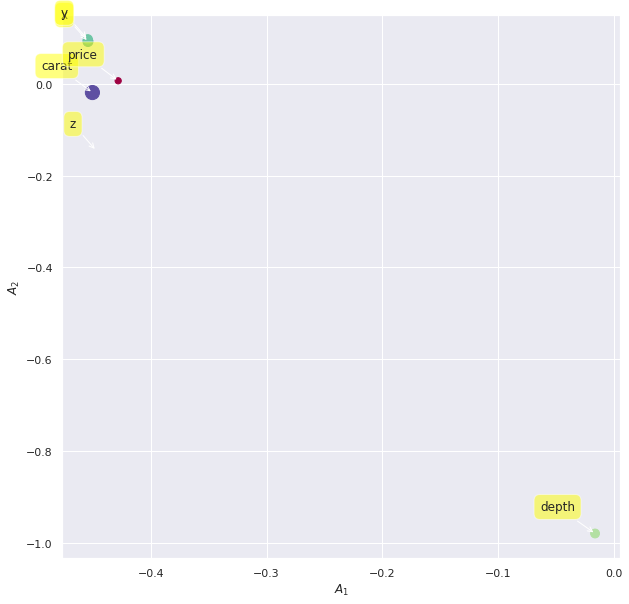

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

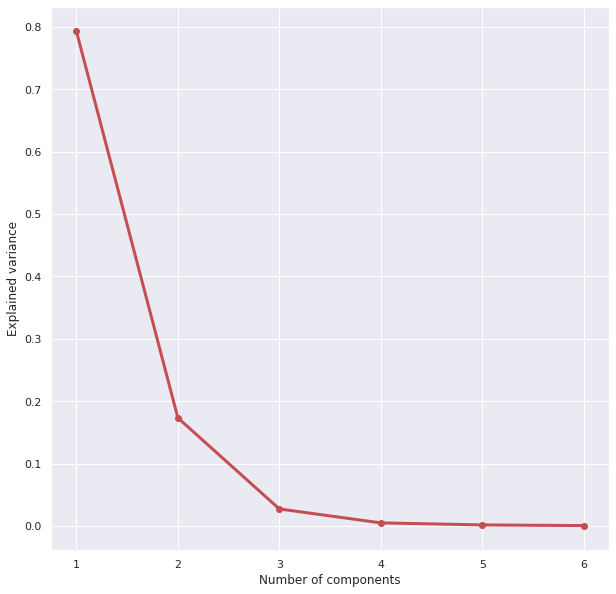

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(10, 10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.savefig('ScreePlot.png')


**Explained Variance**

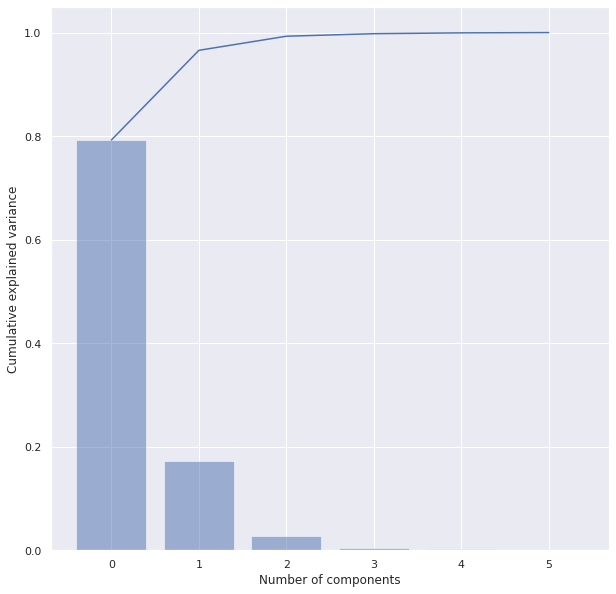

In [ ]:
plt.figure(figsize=(10, 10))
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig('paretoChart.png')

**Biplot**

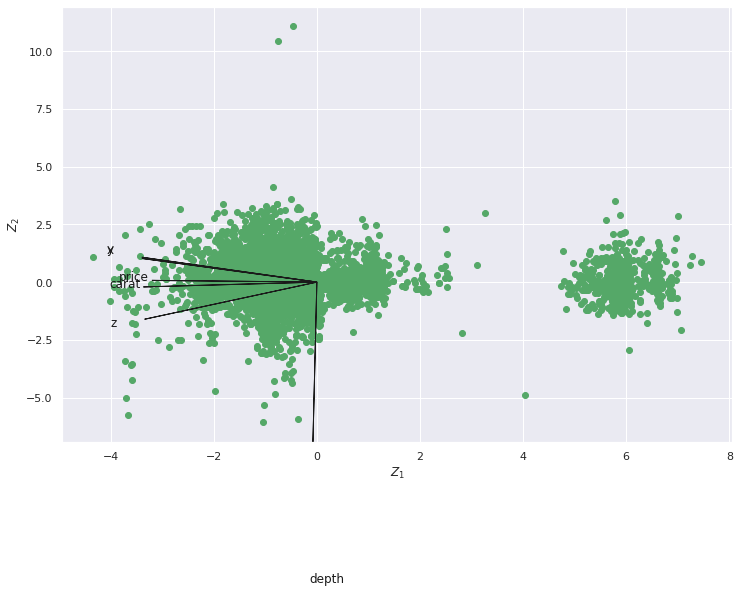

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure(figsize=(12, 8))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

plt.savefig('biplot.png')    

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e1603db94a1216366d306d89c8625adf67591ce6ec04a7ac99ec51bc053bb4f0
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=8f0d6c3eee805fb2a0afa53cba9aa44cc863600ac4f4ebe3b5c7588d264b20a9
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2
0     6.957806  0.105712
1     7.278187  1.117824
2     6.998585  2.875300
3     6.274258 -0.424760
4     5.920406 -0.958997
...        ...       ...
5305 -2.492541  0.330027
5306 -2.780166 -0.224397
5307 -2.162788 -1.459287
5308 -0.542650 -0.919033
5309 -0.464993  0.117430

[5310 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [5310] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [5310] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


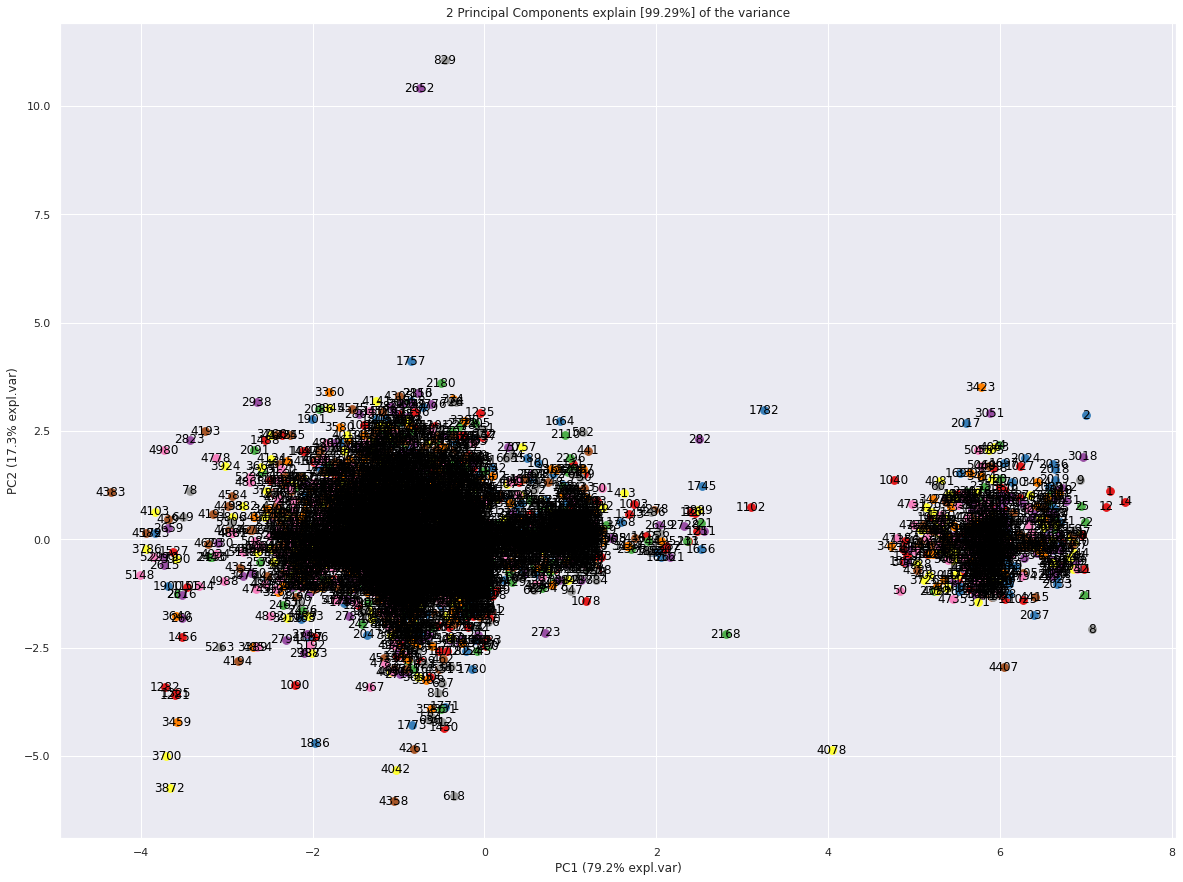

In [ ]:
model.scatter(label=True, legend=False)
plt.savefig('ScatterPlot.png')  

**Eigenvectors**

In [ ]:
A = out['loadings'].T

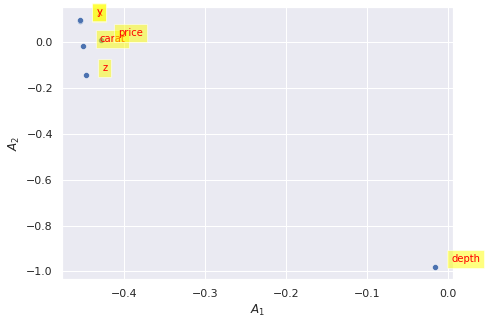

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 
 plt.savefig('eigenVector_color.png')  

**Scree Plot**

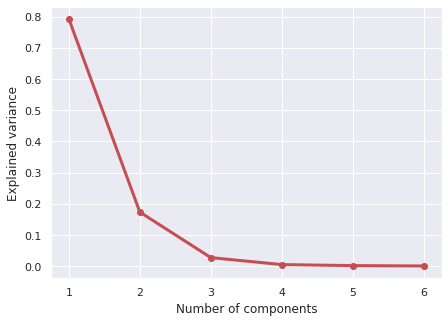

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

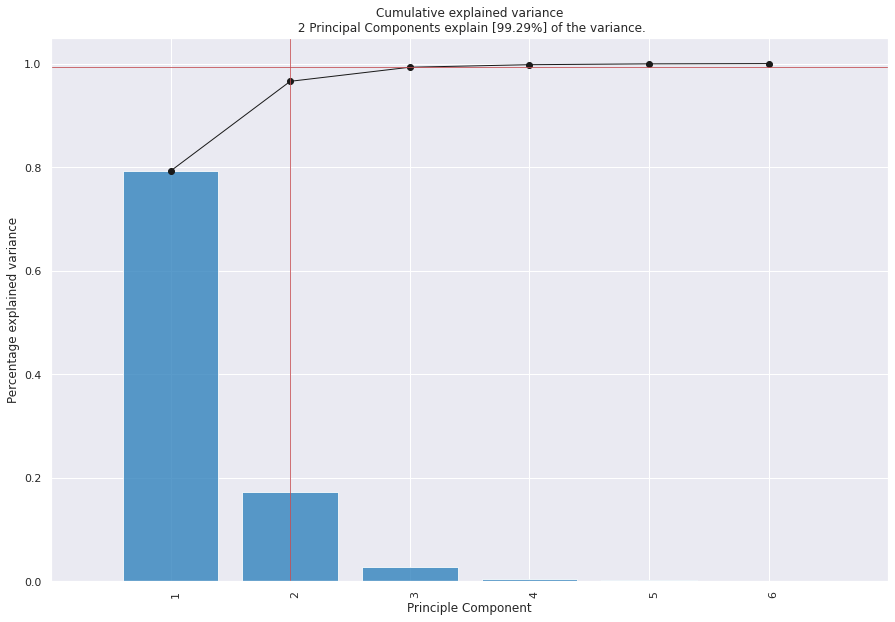

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();
plt.savefig('pareto_fancy.png')


**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [5310] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [5310] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


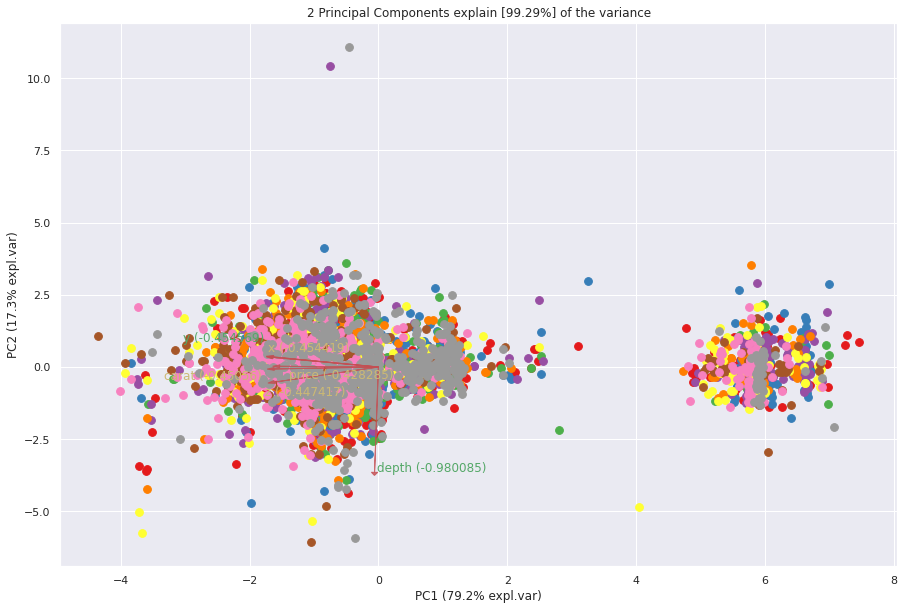

<Figure size 504x360 with 0 Axes>

In [ ]:
model.biplot(label=False, legend=False)
plt.savefig('biplot_color.png')  

In [ ]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 531 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 531 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4779, 7)
Unseen Data For Predictions: (531, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data         (4779, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (3345, 5)
12                    Transformed Test Set         (1434, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              51d3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.4625  0.6221  0.4369  0.4558   
et                 Extra Trees Classifier    0.4601  0.6296  0.4376  0.4545   
rf               Random Forest Classifier    0.4589  0.6225  0.4340  0.4517   
gbc          Gradient Boosting Classifier    0.4535  0.6163  0.4060  0.4493   
knn                K Neighbors Classifier    0.4451  0.5962  0.4224  0.4478   
ada                  Ada Boost Classifier    0.4302  0.5814  0.3696  0.4044   
dt               Decision Tree Classifier    0.4269  0.5605  0.4118  0.4262   
lr                    Logistic Regression    0.4254  0.5184  0.3356  0.2306   
dummy                    Dummy Classifier    0.4254  0.5000  0.3333  0.1810   
qda       Quadratic Discriminant Analysis    0.4236  0.5435  0.3426  0.4217   
lda          Linear Discriminant Analysis    0.4200  0.5520  0.3347  0.2857   
ridge                    Ridge Classifier    0.4185  0.0000  0.3323  0.2800   
nb                            Naive Bayes    0.3620  0.5390  0.3674  0.3652   
svm                   SVM - Linear Kernel    0.3557  0.0000  0.3353  0.1422   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.4542  0.1584  0.1603     0.257  
et        0.4542  0.1597  0.1609     0.356  
rf        0.4510  0.1550  0.1568     0.468  
gbc       0.4204  0.1156  0.1255     0.862  
knn       0.4377  0.1365  0.1387     0.028  
ada       0.3698  0.0607  0.0706     0.139  
dt        0.4258  0.1200  0.1203     0.022  
lr        0.2666  0.0040  0.0091     0.308  
dummy     0.2539  0.0000  0.0000     0.014  
qda       0.2990  0.0150  0.0282     0.013  
lda       0.2838  0.0030  0.0077     0.015  
ridge     0.2765 -0.0020 -0.0031     0.012  
nb        0.3455  0.0478  0.0501     0.013  
svm       0.1947  0.0021  0.0047     0.104

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

Since the below mentioned algorihtms seems to be the top 3 performing models I am using  them


* Light Gradient Boosting Machine (lightgbm)
* Extra Trees Classifier (et)
* Random Forest Classifier	(rf)


**Create Extra Tree Classifier**

In [ ]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4358  0.6111  0.4083  0.4236  0.4251  0.1182  0.1198
1       0.4597  0.6601  0.4369  0.4532  0.4554  0.1653  0.1657
2       0.4269  0.6119  0.4070  0.4222  0.4216  0.1062  0.1070
3       0.4239  0.5936  0.4076  0.4204  0.4217  0.1112  0.1113
4       0.4597  0.6226  0.4493  0.4596  0.4588  0.1674  0.1677
5       0.4731  0.6499  0.4504  0.4709  0.4676  0.1766  0.1781
6       0.4940  0.6296  0.4701  0.4871  0.4882  0.2115  0.2126
7       0.4521  0.6060  0.4255  0.4428  0.4451  0.1464  0.1472
8       0.4850  0.6435  0.4561  0.4824  0.4746  0.1866  0.1911
9       0.4910  0.6681  0.4654  0.4830  0.4841  0.2072  0.2086
Mean    0.4601  0.6296  0.4376  0.4545  0.4542  0.1597  0.1609
SD      0.0244  0.0236  0.0231  0.0250  0.0239  0.0363  0.0367

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'et'. 
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4328  0.5839  0.3507  0.3014  0.3117  0.0349  0.0579
1       0.4358  0.6344  0.3563  0.3124  0.3242  0.0436  0.0673
2       0.3970  0.5608  0.3234  0.2662  0.2936 -0.0174 -0.0251
3       0.4239  0.5743  0.3428  0.3525  0.3029  0.0187  0.0328
4       0.4507  0.5691  0.3672  0.3678  0.3310  0.0621  0.1129
5       0.4431  0.6211  0.3534  0.3530  0.3087  0.0371  0.0811
6       0.4431  0.5654  0.3602  0.3280  0.3328  0.0494  0.0772
7       0.4461  0.5928  0.3625  0.3250  0.3355  0.0564  0.0856
8       0.4251  0.5891  0.3482  0.3159  0.3205  0.0245  0.0376
9       0.4461  0.6344  0.3680  0.3329  0.3427  0.0624  0.0920
Mean    0.4344  0.5925  0.3533  0.3255  0.3204  0.0372  0.0620
SD      0.0151  0.0265  0.0126  0.0277  0.0150  0.0230  0.0371

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate Extra Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4657  0.6273  0.4355  0.4556  0.4515  0.1572  0.1611
1       0.4597  0.6480  0.4398  0.4545  0.4560  0.1649  0.1653
2       0.4448  0.5996  0.4211  0.4375  0.4384  0.1348  0.1358
3       0.4149  0.5919  0.3996  0.4127  0.4127  0.0968  0.0971
4       0.4567  0.6160  0.4372  0.4516  0.4526  0.1579  0.1585
5       0.4760  0.6429  0.4493  0.4701  0.4678  0.1769  0.1791
6       0.4581  0.6129  0.4325  0.4493  0.4517  0.1557  0.1565
7       0.4222  0.5943  0.3972  0.4158  0.4145  0.0947  0.0957
8       0.4701  0.6323  0.4308  0.4556  0.4500  0.1571  0.1628
9       0.5210  0.6599  0.4966  0.5144  0.5147  0.2541  0.2557
Mean    0.4589  0.6225  0.4340  0.4517  0.4510  0.1550  0.1568
SD      0.0279  0.0223  0.0263  0.0271  0.0271  0.0422  0.0426

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4746  0.5959  0.4135  0.4676  0.4203  0.1381  0.1595
1       0.4209  0.6098  0.3588  0.3949  0.3564  0.0416  0.0512
2       0.4060  0.5512  0.3616  0.3982  0.3746  0.0414  0.0446
3       0.4090  0.5562  0.3379  0.3489  0.3184  0.0099  0.0136
4       0.4537  0.5884  0.3861  0.5002  0.3796  0.0839  0.1160
5       0.4192  0.5724  0.3672  0.3954  0.3786  0.0565  0.0626
6       0.4042  0.5433  0.3594  0.3809  0.3754  0.0402  0.0426
7       0.4341  0.5998  0.3765  0.4043  0.3666  0.0685  0.0834
8       0.4431  0.5883  0.3925  0.4359  0.4045  0.0943  0.1041
9       0.4281  0.5874  0.3618  0.4046  0.3559  0.0474  0.0606
Mean    0.4293  0.5793  0.3715  0.4131  0.3730  0.0622  0.0738
SD      0.0215  0.0213  0.0202  0.0415  0.0263  0.0341  0.0405

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4537  0.5957  0.4293  0.4489  0.4450  0.1420  0.1443
1       0.5134  0.6479  0.4843  0.5040  0.5043  0.2398  0.2421
2       0.4060  0.5724  0.3838  0.3990  0.3991  0.0721  0.0728
3       0.4478  0.5905  0.4322  0.4449  0.4443  0.1420  0.1427
4       0.4925  0.6302  0.4798  0.4917  0.4912  0.2171  0.2174
5       0.5389  0.6755  0.5168  0.5339  0.5349  0.2839  0.2848
6       0.4551  0.6106  0.4244  0.4440  0.4445  0.1433  0.1453
7       0.4491  0.6129  0.4151  0.4358  0.4379  0.1351  0.1368
8       0.4431  0.6163  0.4135  0.4307  0.4318  0.1277  0.1293
9       0.4611  0.6493  0.4446  0.4592  0.4598  0.1704  0.1705
Mean    0.4661  0.6201  0.4424  0.4592  0.4593  0.1673  0.1686
SD      0.0365  0.0295  0.0378  0.0376  0.0378  0.0590  0.0590

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data         (4779, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (3345, 2)
12                    Transformed Test Set         (1434, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b690
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.4377  0.5804  0.3779  0.4194   
ada                  Ada Boost Classifier    0.4350  0.5689  0.3645  0.4233   
lr                    Logistic Regression    0.4254  0.5195  0.3333  0.1810   
nb                            Naive Bayes    0.4254  0.5295  0.3333  0.1810   
ridge                    Ridge Classifier    0.4254  0.0000  0.3333  0.1810   
lda          Linear Discriminant Analysis    0.4254  0.5198  0.3333  0.1810   
dummy                    Dummy Classifier    0.4254  0.5000  0.3333  0.1810   
qda       Quadratic Discriminant Analysis    0.4245  0.5365  0.3327  0.1887   
rf               Random Forest Classifier    0.4120  0.5694  0.3912  0.4060   
et                 Extra Trees Classifier    0.4060  0.5668  0.3862  0.4008   
lightgbm  Light Gradient Boosting Machine    0.4054  0.5730  0.3745  0.3911   
knn                K Neighbors Classifier    0.3949  0.5550  0.3691  0.3853   
dt               Decision Tree Classifier    0.3893  0.5337  0.3762  0.3908   
svm                   SVM - Linear Kernel    0.3555  0.0000  0.3291  0.2972   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.3810  0.0770  0.0888     0.995  
ada       0.3526  0.0536  0.0731     0.143  
lr        0.2539  0.0000  0.0000     0.252  
nb        0.2539  0.0000  0.0000     0.013  
ridge     0.2539  0.0000  0.0000     0.011  
lda       0.2539  0.0000  0.0000     0.021  
dummy     0.2539  0.0000  0.0000     0.012  
qda       0.2541 -0.0013 -0.0081     0.023  
rf        0.4072  0.0887  0.0890     0.456  
et        0.4022  0.0807  0.0809     0.430  
lightgbm  0.3930  0.0662  0.0672     0.237  
knn       0.3810  0.0553  0.0566     0.028  
dt        0.3894  0.0661  0.0662     0.020  
svm       0.3003 -0.0074 -0.0087     0.036

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4478  0.5710  0.3764  0.4174  0.3654  0.0793  0.1017
1       0.4478  0.6328  0.3789  0.4190  0.3702  0.0807  0.1018
2       0.4149  0.5557  0.3482  0.4311  0.3368  0.0255  0.0323
3       0.4328  0.5382  0.3639  0.4050  0.3538  0.0577  0.0717
4       0.4209  0.5585  0.3562  0.3798  0.3489  0.0414  0.0501
5       0.4341  0.6303  0.3601  0.4182  0.3482  0.0457  0.0625
6       0.4401  0.5560  0.3689  0.4366  0.3631  0.0585  0.0775
7       0.4431  0.5642  0.3685  0.4539  0.3546  0.0619  0.0820
8       0.4311  0.5904  0.3613  0.4217  0.3499  0.0485  0.0632
9       0.4551  0.6137  0.3821  0.4048  0.3702  0.0893  0.1153
Mean    0.4368  0.5811  0.3664  0.4188  0.3561  0.0589  0.0758
SD      0.0119  0.0320  0.0101  0.0190  0.0103  0.0188  0.0242

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 14.5 MB/s 
     |████████████████████████████████| 25.3 MB 74.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

NameError: ignored

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


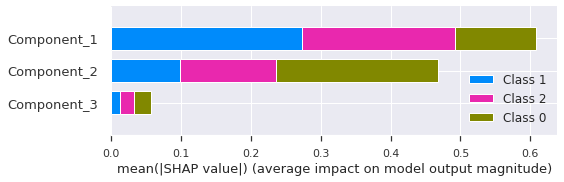

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
